---
image: geopandas.png
title: Python
subtitle: Data analysis with GeoPandas
date: '2023-12-29'
categories: [Python, GeoPandas, Data Analysis]
author: Kunal Khurana
jupyter: python3
toc: True
---

In [76]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString

# for interactive maps
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math

> __GeoDataFrame which has all capabilities of Pandas DataFrame__

- Basic information (Gograhical data Frame) 

> gdf.info()

> gdf.columns

> gdf.shape

> gdf.dtypes

- Geospatial-Attributes

> gdf.geometry

> gdf.crs

> gdf.geom_type - provides geometry for each row (ponit, LineString, Polygon, etc.)

- Data Exploration:

> gdf.head()

> gdf.describe()

- Spatial Operation:

> gdf.area

> gdf.distance

> gdf.buffer

- Plotting

> gdf.plot()


In [31]:
data = gpd.read_file("C:\\Users\\Khurana_Kunal\\Downloads\\DEC_lands 2\\DEC_lands")

In [8]:
data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [9]:
data_selected = data.loc[:, ['CLASS', 'COUNTY', 'geometry']].copy()

In [10]:
data_selected.CLASS.value_counts()

CLASS
WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: count, dtype: int64

In [12]:
# select lands under 'wild forest' or 'wilderness' category
wild_lands = data_selected.loc[data_selected.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


<Axes: >

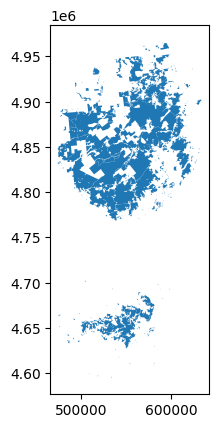

In [13]:
wild_lands.plot()

In [15]:
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

In [6]:
world_filepath ='geopandas\\ne_110m_admin_0_countries\\ne_110m_admin_0_countries.shx'
world = gpd.read_file(world_filepath)
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


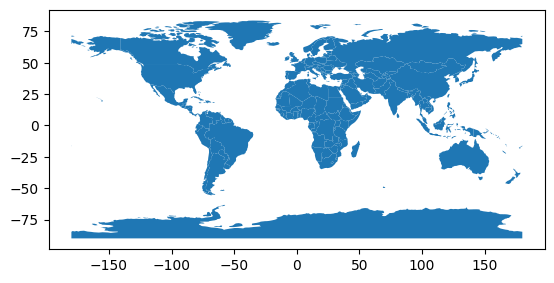

In [22]:
ax = world.plot()

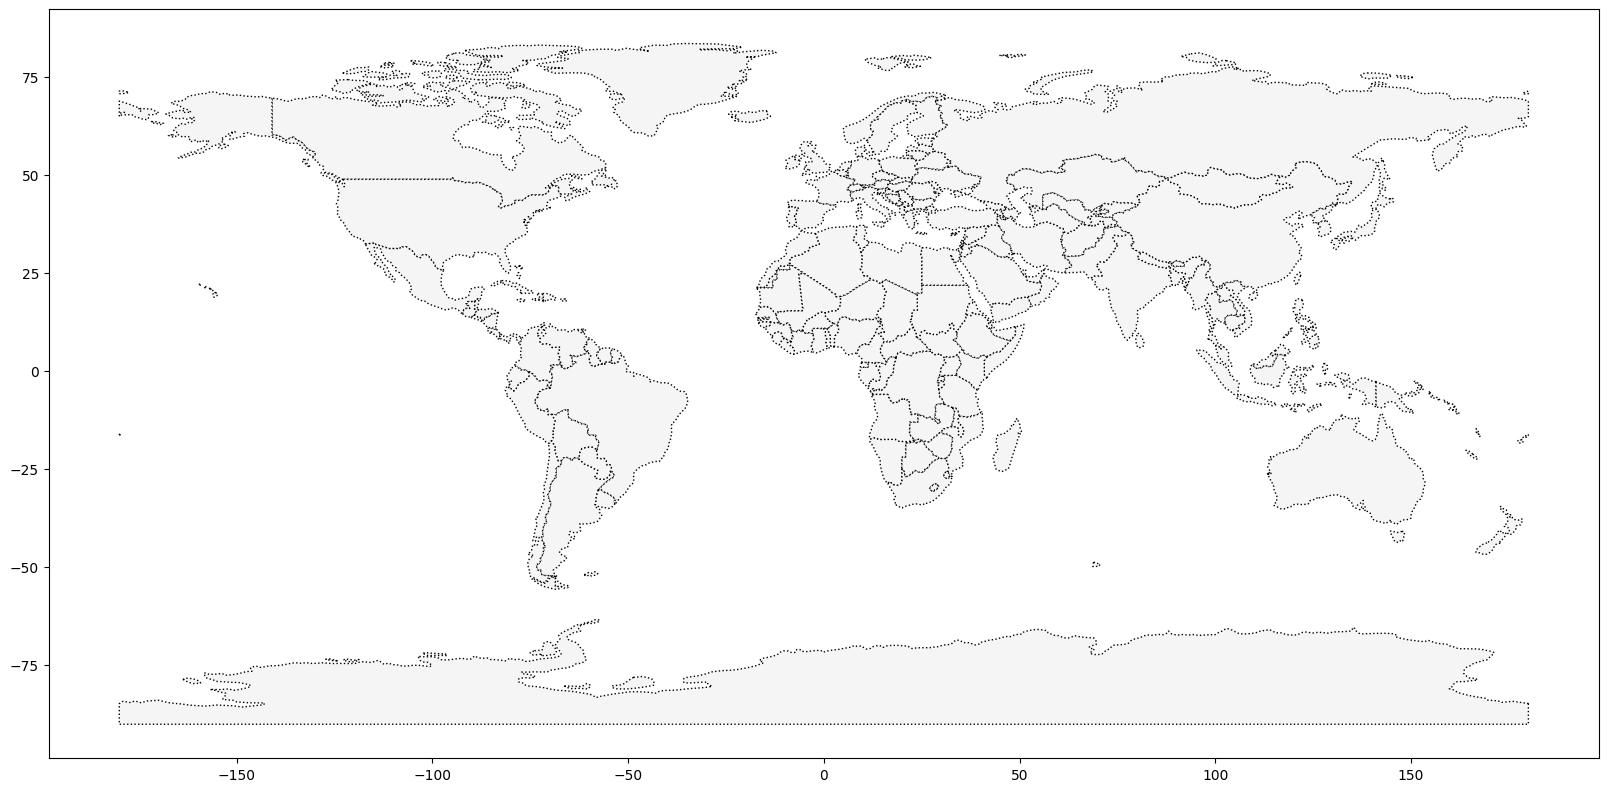

In [18]:
#plotting a map with coordinates
ax = world.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')


In [43]:
PHL_loans = data.loc[data.COUNTY=="Philippines"].copy()


In [37]:
print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [38]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int64(25), object(137)
memory usage: 233.8+ KB


In [32]:
world.head()


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


## Coordinate Reference Systems

- shape file imports CRS automatically
- settings (DataFrame uses __EPSG 32630__; csv file uses __EPSG 4326__) 

In [37]:
facilities_df = pd.read_csv('geopandas\health_facilities.csv')

# convert to GeoDataFrame
facilities = gpd.GeoDataFrame(facilities_df, geometry = gpd.points_from_xy
                              (facilities_df.Longitude, facilities_df.Latitude))

# set CRS
facilities.crs = ('epsg:4326')

#view first 5 rows
facilities.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


C:\Users\Khurana_Kunal\anaconda3\Lib\site-packages\shapely\measurement.py:103: RuntimeWarning: invalid value encountered in bounds
  return lib.bounds(geometry_arr, out=out, **kwargs)


<Axes: >

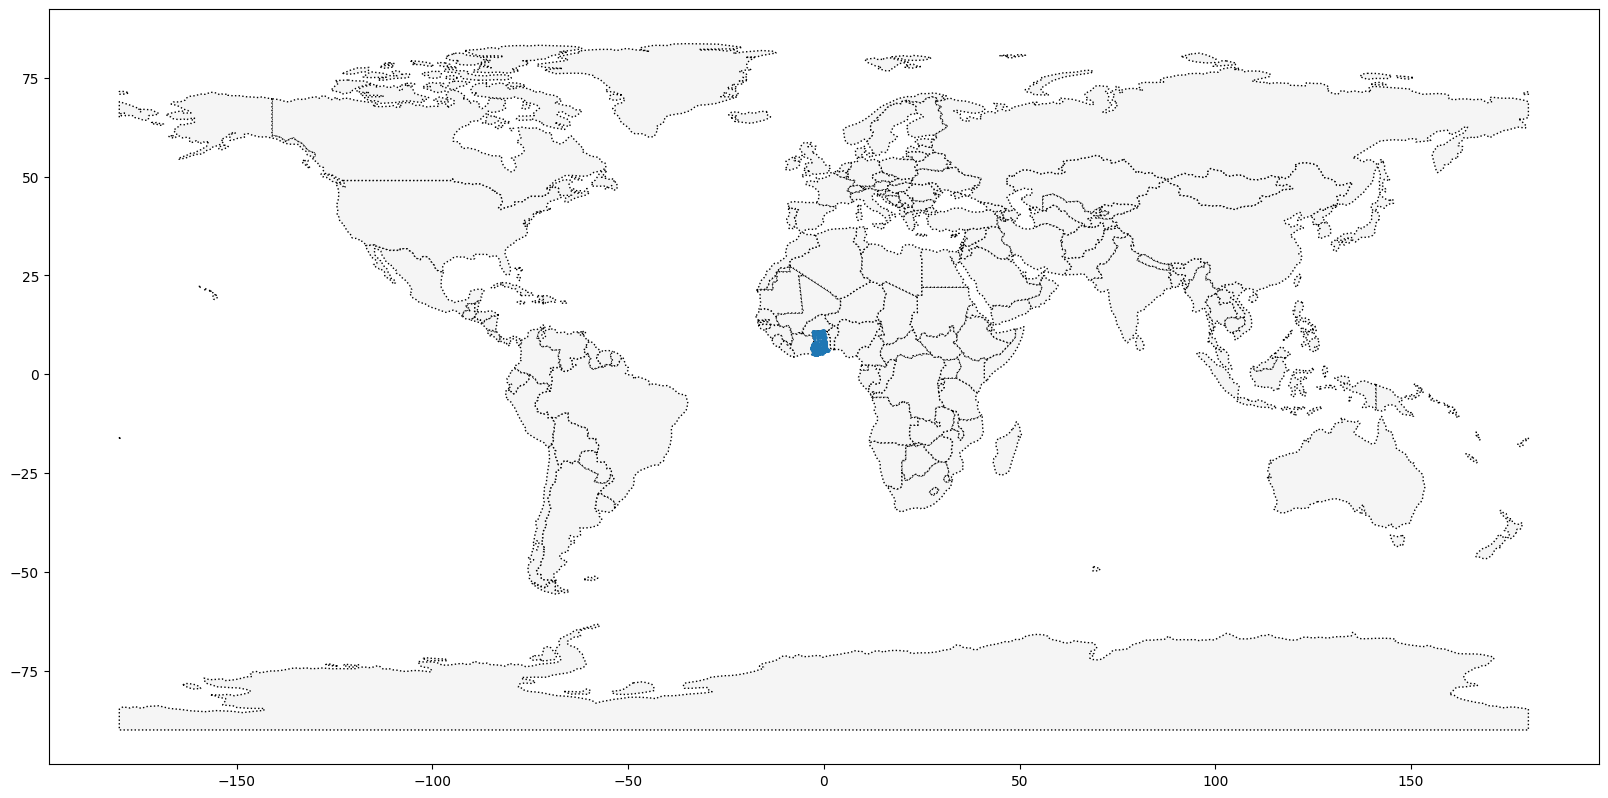

In [26]:
# plotting facilities of Ghana on world map
ax = world.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')
facilities.to_crs(epsg=4326).plot(markersize=.25, ax=ax)

In [11]:
#get the x coordinates of each point
facilities.geometry.head().x

0   -1.96317
1   -1.58592
2   -1.34982
3   -1.61098
4   -1.61098
dtype: float64

In [14]:
birds_df = pd.read_csv("data_for_all_courses\purple_martin.csv")
birds_df.head()

,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


In [9]:
print(f"There are {birds_df['tag-local-identifier'].nunique()} different birds in the dataset.")

There are 11 different birds in the dataset.


In [15]:
birds = gpd.GeoDataFrame(birds_df,
                         geometry = gpd.points_from_xy(birds_df["location-long"],
                                                      birds_df['location-lat']))
birds.head()

,timestamp,location-long,location-lat,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.146014,17.513049,30448,POINT (-88.14601 17.51305)
1,2014-09-01 05:59:00,-85.243501,13.095782,30448,POINT (-85.24350 13.09578)
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448,POINT (-62.90609 -7.85244)
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448,POINT (-61.77683 -11.72390)
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448,POINT (-61.24154 -11.61224)


In [41]:
# set the CRS

birds.crs = ('epsg:4326')

In [31]:
# plot the data
americas = world.loc[world['CONTINENT'].isin(['North America', 'South America',])]
americas.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
9,Admin-0 country,1,2,Argentina,ARG,0,2,Sovereign country,1,Argentina,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,Admin-0 country,1,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
16,Admin-0 country,1,5,Haiti,HTI,0,2,Sovereign country,1,Haiti,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."


In [24]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [27]:
# checking for all the columns in a data frame with for loop
for column in world.columns:
    print(column)

featurecla
scalerank
LABELRANK
SOVEREIGNT
SOV_A3
ADM0_DIF
LEVEL
TYPE
TLC
ADMIN
ADM0_A3
GEOU_DIF
GEOUNIT
GU_A3
SU_DIF
SUBUNIT
SU_A3
BRK_DIFF
NAME
NAME_LONG
BRK_A3
BRK_NAME
BRK_GROUP
ABBREV
POSTAL
FORMAL_EN
FORMAL_FR
NAME_CIAWF
NOTE_ADM0
NOTE_BRK
NAME_SORT
NAME_ALT
MAPCOLOR7
MAPCOLOR8
MAPCOLOR9
MAPCOLOR13
POP_EST
POP_RANK
POP_YEAR
GDP_MD
GDP_YEAR
ECONOMY
INCOME_GRP
FIPS_10
ISO_A2
ISO_A2_EH
ISO_A3
ISO_A3_EH
ISO_N3
ISO_N3_EH
UN_A3
WB_A2
WB_A3
WOE_ID
WOE_ID_EH
WOE_NOTE
ADM0_ISO
ADM0_DIFF
ADM0_TLC
ADM0_A3_US
ADM0_A3_FR
ADM0_A3_RU
ADM0_A3_ES
ADM0_A3_CN
ADM0_A3_TW
ADM0_A3_IN
ADM0_A3_NP
ADM0_A3_PK
ADM0_A3_DE
ADM0_A3_GB
ADM0_A3_BR
ADM0_A3_IL
ADM0_A3_PS
ADM0_A3_SA
ADM0_A3_EG
ADM0_A3_MA
ADM0_A3_PT
ADM0_A3_AR
ADM0_A3_JP
ADM0_A3_KO
ADM0_A3_VN
ADM0_A3_TR
ADM0_A3_ID
ADM0_A3_PL
ADM0_A3_GR
ADM0_A3_IT
ADM0_A3_NL
ADM0_A3_SE
ADM0_A3_BD
ADM0_A3_UA
ADM0_A3_UN
ADM0_A3_WB
CONTINENT
REGION_UN
SUBREGION
REGION_WB
NAME_LEN
LONG_LEN
ABBREV_LEN
TINY
HOMEPART
MIN_ZOOM
MIN_LABEL
MAX_LABEL
LABEL_X
LABEL_Y
NE_ID
WIKIDA

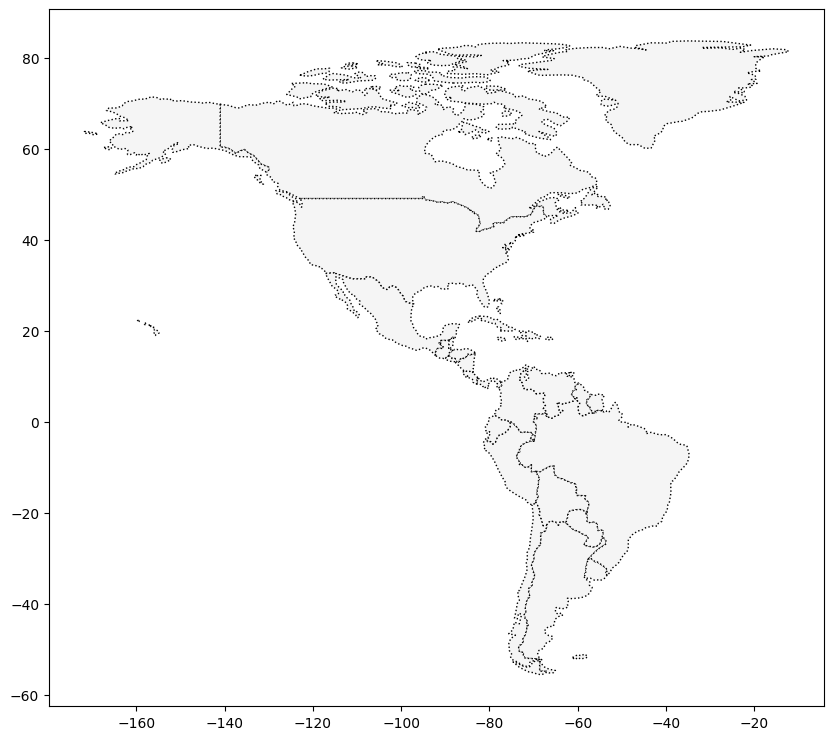

In [32]:
# plot americas
ax_americas = americas.plot(figsize=(10,10), color='whitesmoke', linestyle=':', edgecolor='black')


### Starting and end journey of birds

In [23]:
# GeoDataFrame showing path for each bird
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry = path_df.geometry)
path_gdf.crs = ('epsg:4326')

# GeoDataFrame showing starting point for each bird
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry = start_df.geometry)
start_gdf.crs = ('epsg:4326')

# Show first five rows of GeoDataFrame
start_gdf.head()

,tag-local-identifier,geometry
0,30048,POINT (-90.12992 20.73242)
1,30054,POINT (-93.60861 46.50563)
2,30198,POINT (-80.31036 25.92545)
3,30263,POINT (-76.78146 42.99209)
4,30275,POINT (-76.78213 42.99207)


In [24]:
# end point of each bird
end_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry = end_df.geometry)
end_gdf.crs = ('epsg:4326')

<Axes: >

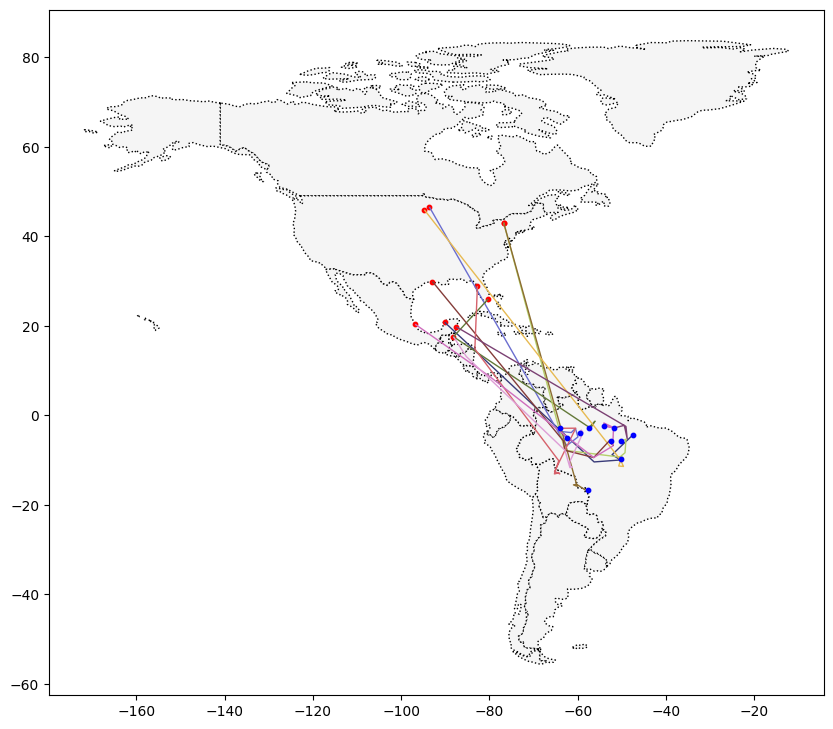

In [35]:
# plot americas
ax_americas = americas.plot(figsize=(10,10), color='whitesmoke', linestyle=':', edgecolor='black')

start_gdf.plot(ax = ax_americas, color = 'red', markersize = 10)
path_gdf.plot(ax = ax_americas, cmap = 'tab20b', linestyle= '-', linewidth = 1, zorder = 1)
end_gdf.plot(ax = ax_americas, color = 'blue', markersize = 10)

In [ ]:
# no file found; gives 'Driver Error' - à voir plustard
protected_filepath = 'data_for_all_courses/add_0.shp'
protected_area = gpd.read_file(protected_filepath)


## Interactive maps


In [74]:
# Create a map
montréal_1 = folium.Map(location=[45.50, -73.56], tiles='openstreetmap', zoom_start=10)


# Display the map
montréal_1

In [59]:
# crimes

crimes = pd.read_csv("data_for_all_courses\crime.csv", encoding = 'latin-1')
crimes.describe()



,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [60]:
crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [62]:
# drop missing locations
crimes.dropna(subset= ['Lat', 'Long', 'DISTRICT'], inplace = True)

In [66]:
# focus on major crimes
crimes = crimes[crimes.OFFENSE_CODE_GROUP.isin([
    'Larceny', 'Auto Theft', 'Robbery', 'Larceny From Motor Vehicle', 'Residential Burglary',
    'Simple Assault', 'Harassment', 'Ballistics', 'Aggravated Assault', 'Other Burglary', 
    'Arson', 'Commercial Burglary'    
])]

crimes = crimes[crimes.YEAR>=2018]

crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
19,I182070915,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,181,NaN,2018-09-02 18:00:00,2018,9,Sunday,18,Part One,SHIRLEY ST,42.325695,-71.068168,"(42.32569490, -71.06816778)"
24,I182070908,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,911,NaN,2018-09-03 18:38:00,2018,9,Monday,18,Part One,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"


In [67]:
# crimes between 9 to 18 

daytime_robberies = crimes[((crimes.OFFENSE_CODE_GROUP == 'Robbery') & 
                            crimes.HOUR.isin(range(9,18)))]

In [73]:
# create a map

map2 = folium.Map(location=[42.32,-71.0589], tiles='openstreetmap', zoom_start=13)

# add points
for idx, row in daytime_robberies.iterrows():
    Marker([row['Lat'], row['Long']]).add_to(map2)
    
    
# display
map2

### folium.plugin.MarkerCluster

In [79]:
# plotting points
m_3 = folium.Map(location= [42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

# add points
mc = MarkerCluster()
for idx, row in daytime_robberies.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(Marker([row['Lat'], row['Long']]))
m_3.add_child(mc)
    

### Bubble maps

In [88]:
# create a base map

m_4 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=11)

def color_producer(val):
    if val >=12:
        return 'forestgreen'
    else:
        return 'darkred'
    
# add bubble map to the base map
for i in range(0, len(daytime_robberies)):
    Circle(
    location = [daytime_robberies.iloc[i]['Lat'], 
               daytime_robberies.iloc[i]['Long']],
    radius = 20,
    color = color_producer(daytime_robberies.iloc[i]['HOUR'])).add_to(m_4)
    
# display
m_4

### Heatmaps

In [87]:
# basemaps
m_5 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=11)

# add heatmaps to the base map
HeatMap(data= crimes[['Lat', 'Long']], radius = 10).add_to(m_5)

# display
m_5

### Choropleth maps

In [91]:
help(folium.Choropleth)

Help on class Choropleth in module folium.features:

class Choropleth(folium.map.FeatureGroup)
 |  Choropleth(geo_data: Any, data: Optional[Any] = None, columns: Optional[Sequence[Any]] = None, key_on: Optional[str] = None, bins: Union[int, Sequence[float]] = 6, fill_color: Optional[str] = None, nan_fill_color: str = 'black', fill_opacity: float = 0.6, nan_fill_opacity: Optional[float] = None, line_color: str = 'black', line_weight: float = 1, line_opacity: float = 1, name: Optional[str] = None, legend_name: str = '', overlay: bool = True, control: bool = True, show: bool = True, topojson: Optional[str] = None, smooth_factor: Optional[float] = None, highlight: bool = False, use_jenks: bool = False, **kwargs)
 |  
 |  Apply a GeoJSON overlay to the map.
 |  
 |  Plot a GeoJSON overlay on the base map. There is no requirement
 |  to bind data (passing just a GeoJSON plots a single-color overlay),
 |  but there is a data binding option to map your columnar data to
 |  different feature ob